### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [46]:
import pandas as pd

m_df = pd.read_csv('./datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [47]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [48]:
m_df.duplicated().sum()

47

In [49]:
m_df.drop_duplicates(inplace=True)
m_df.duplicated().sum()

0

In [50]:
m_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [51]:
m_df = m_df.reset_index(drop=True)
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [52]:
m_df.date = pd.to_datetime(m_df.date)
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [53]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1295 non-null   datetime64[ns]
 1   mosquito_Indicator  1295 non-null   float64       
 2   rain(mm)            1295 non-null   float64       
 3   mean_T(℃)           1295 non-null   float64       
 4   min_T(℃)            1295 non-null   float64       
 5   max_T(℃)            1295 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 60.8 KB


In [54]:
group_m_df = m_df[['date', 'mosquito_Indicator']].groupby('date').sum('mosquito_Indocator').reset_index()

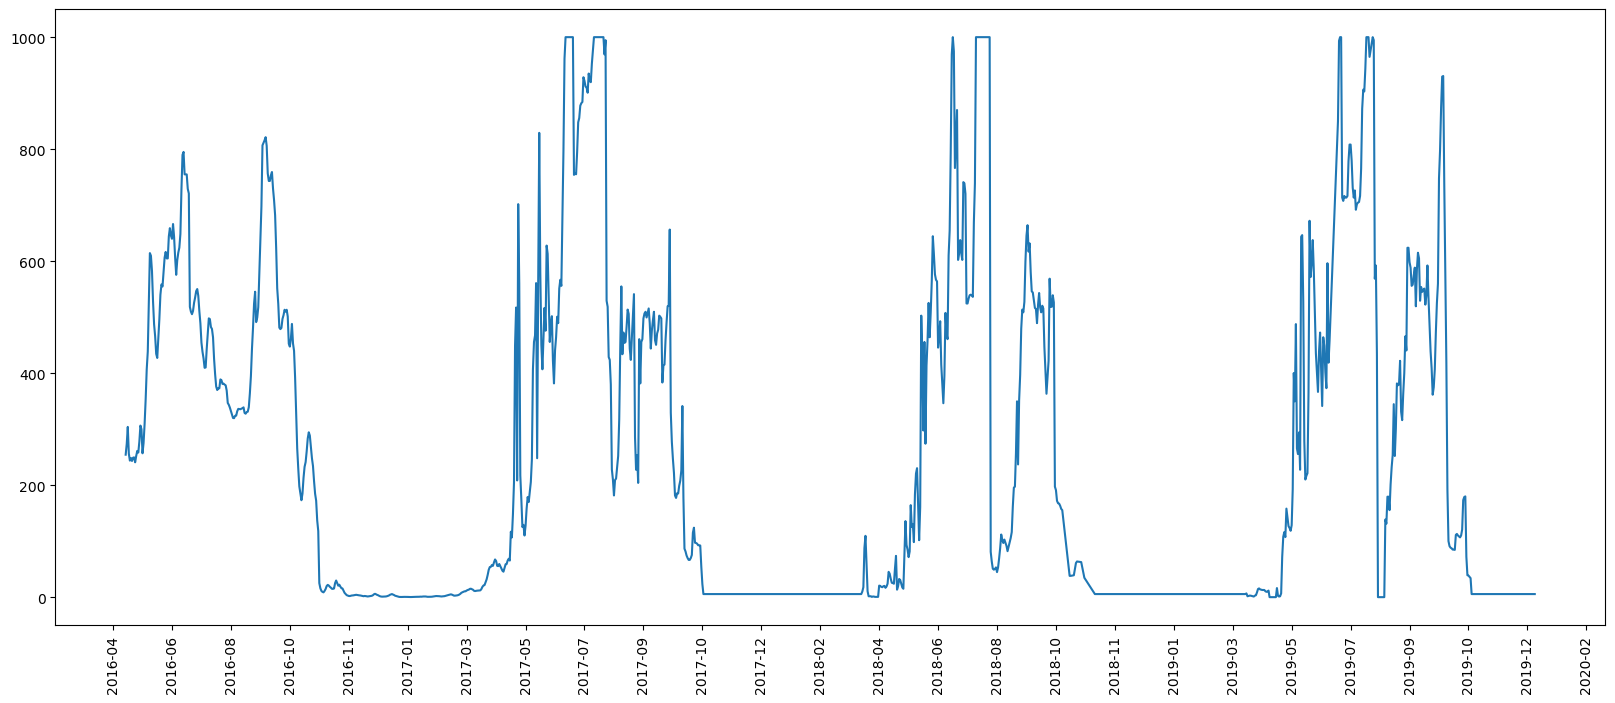

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

date_format = mdates.DateFormatter('%Y-%m')

# 8주 단위
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax.xaxis.set_major_formatter(date_format)
ax.plot(group_m_df['date'], group_m_df['mosquito_Indicator'])
plt.xticks(rotation=90)
plt.show()

C:\Users\hyuns\AppData\Local\Temp\ipykernel_25236\3671149696.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columns[i], y='mosquito_Indicator', data=m_df, palette='muted', ax=axes[i])
C:\Users\hyuns\AppData\Local\Temp\ipykernel_25236\3671149696.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columns[i], y='mosquito_Indicator', data=m_df, palette='muted', ax=axes[i])
C:\Users\hyuns\AppData\Local\Temp\ipykernel_25236\3671149696.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columns[i], y='mosquito_Indicator', data=m_df, palette='muted', ax=axes[i])
C:\Users\hyuns\AppData\Local\Temp\ipykernel_25236\3671149696.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columns[i], y='mosquito_Indicator', data=m_df, palette='muted', ax=axes[i])


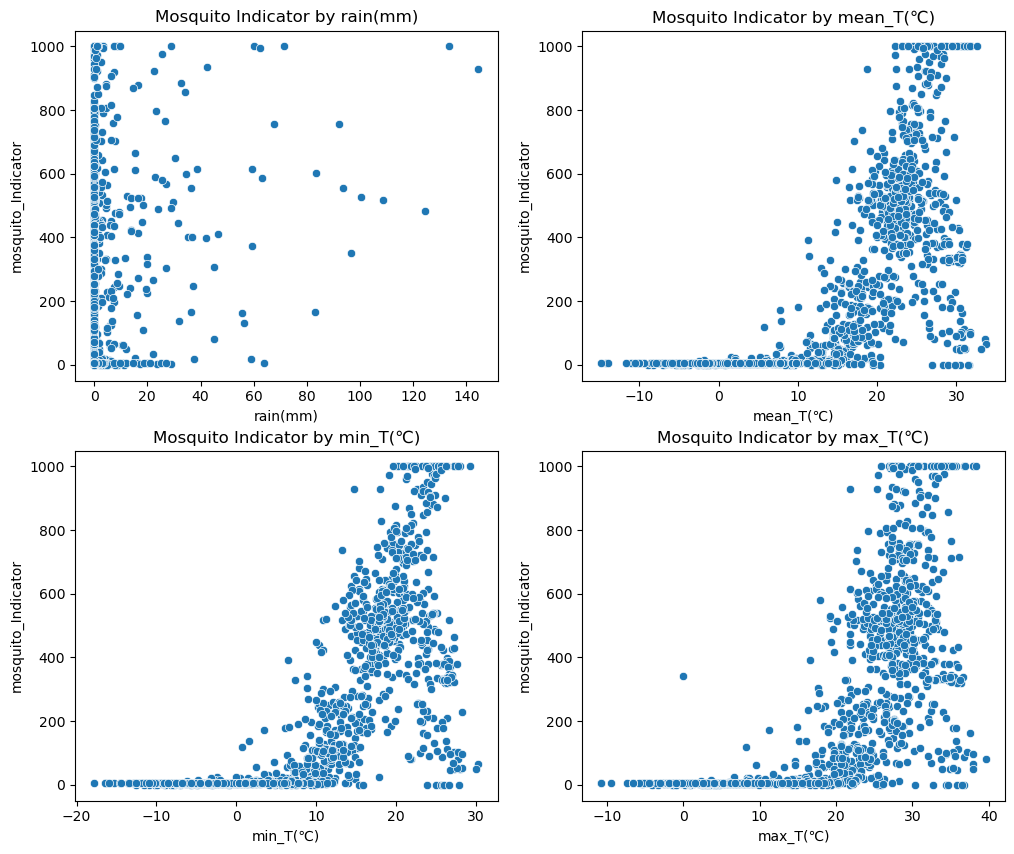

In [56]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

columns = m_df.columns[2:]
for i in range(len(columns)):
    sns.scatterplot(x=columns[i], y='mosquito_Indicator', data=m_df, palette='muted', ax=axes[i])
    axes[i].set_title(f'Mosquito Indicator by {columns[i]}')
plt.show()

In [57]:
pre_m_df = m_df[['rain(mm)', 'mean_T(℃)', 'min_T(℃)', 'max_T(℃)', 'mosquito_Indicator']]
pre_m_df

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1290,0.0,-1.7,-4.6,2.6,5.5
1291,0.0,1.1,-3.6,6.1,5.5
1292,1.4,3.8,1.1,6.2,5.5
1293,0.4,2.7,-5.7,6.8,5.5


In [58]:
pre_m_df.corr()['mosquito_Indicator'].sort_values(ascending=False)[1:]

min_T(℃)     0.743387
mean_T(℃)    0.728177
max_T(℃)     0.698576
rain(mm)     0.186194
Name: mosquito_Indicator, dtype: float64

<Axes: >

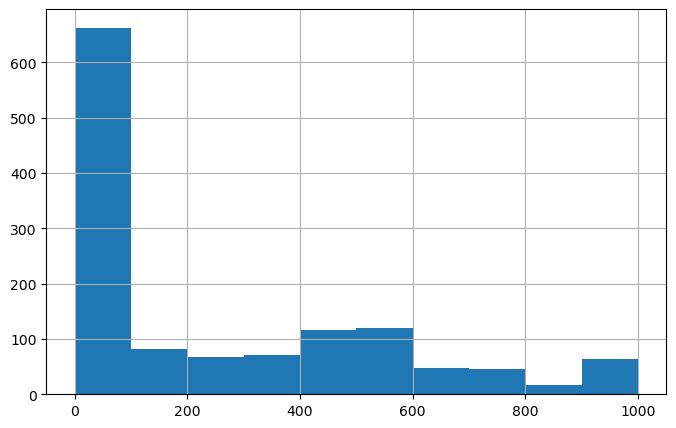

In [59]:
pre_m_df['mosquito_Indicator'].hist(figsize=(8, 5))

<Axes: >

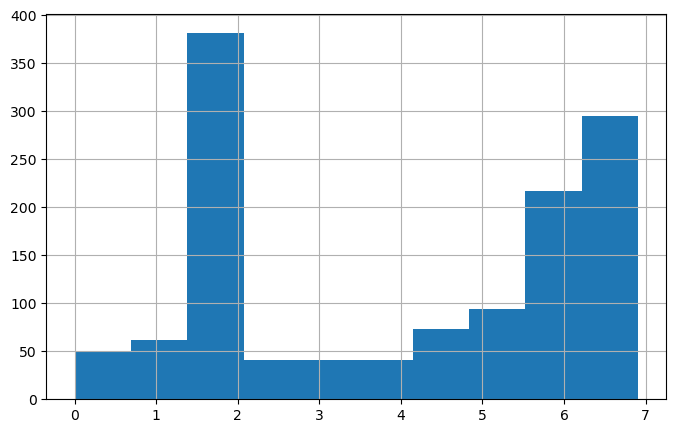

In [60]:
import numpy as np

np.log1p(pre_m_df['mosquito_Indicator']).hist(figsize=(8, 5))

In [61]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              902.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:06:29   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1291   BIC:                                  1.740e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [63]:
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(℃)
2,200.659322,min_T(℃)
3,342.476613,max_T(℃)


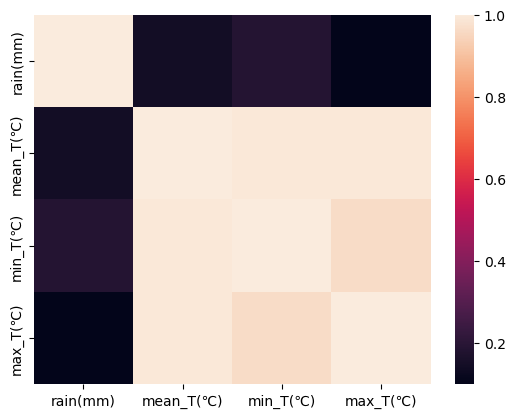

In [64]:
sns.heatmap(features.corr())
plt.show()

In [65]:
features.corr()

,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
rain(mm),1.000000,0.144857,0.186602,0.099130
mean_T(℃),0.144857,1.000000,0.990115,0.989594
min_T(℃),0.186602,0.990115,1.000000,0.964792
max_T(℃),0.099130,0.989594,0.964792,1.000000


In [66]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [68]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44528.4874, RMSE: 211.0177, R2: 0.5505


- 평균 기온을 삭제해봅니다.

In [69]:
pre_m_df2 = pre_m_df.drop(labels=['mean_T(℃)'], axis=1)
pre_m_df2

,rain(mm),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,12.2,26.0,254.4
1,16.5,16.5,28.4,273.5
2,27.0,8.9,17.6,304.0
3,0.0,10.2,20.6,256.2
4,7.5,10.2,26.9,243.8
...,...,...,...,...
1290,0.0,-4.6,2.6,5.5
1291,0.0,-3.6,6.1,5.5
1292,1.4,1.1,6.2,5.5
1293,0.4,-5.7,6.8,5.5


In [70]:
from statsmodels.api import OLS

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              1203.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:06:29   Log-Likelihood:                         -8686.6
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1292   BIC:                                  1.739e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
get_vif(features)

,vif_score,feature
0,1.105090,rain(mm)
1,8.572705,min_T(℃)
2,8.381716,max_T(℃)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [73]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44528.4874, RMSE: 211.0177, R2: 0.5505


- 타겟 데이터의 분포를 맞춰봅니다.

<Axes: >

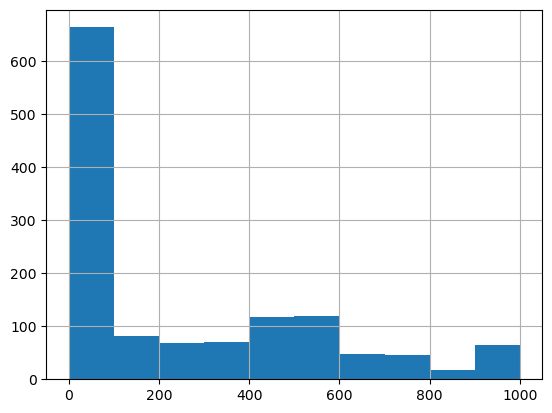

In [74]:
pre_m_df2['mosquito_Indicator'].hist()

In [75]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_m_df2[['mosquito_Indicator']])
pre_m_df2['Target_yeo'] = result
pre_m_df2

,rain(mm),min_T(℃),max_T(℃),mosquito_Indicator,Target_yeo
0,0.0,12.2,26.0,254.4,6.571413
1,16.5,16.5,28.4,273.5,6.672078
2,27.0,8.9,17.6,304.0,6.819922
3,0.0,10.2,20.6,256.2,6.581196
4,7.5,10.2,26.9,243.8,6.512448
...,...,...,...,...,...
1290,0.0,-4.6,2.6,5.5,1.980530
1291,0.0,-3.6,6.1,5.5,1.980530
1292,1.4,1.1,6.2,5.5,1.980530
1293,0.4,-5.7,6.8,5.5,1.980530


<Axes: >

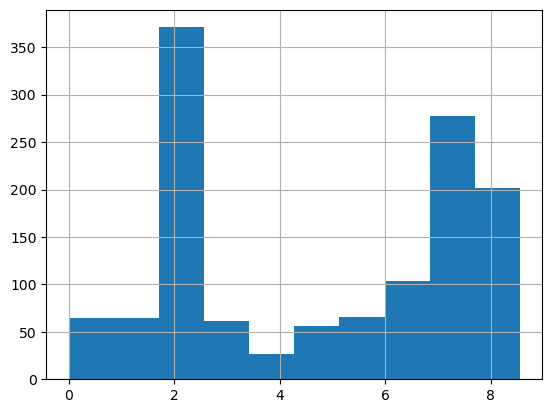

In [76]:
pre_m_df2['Target_yeo'].hist()

In [77]:
pre_m_df2 = pre_m_df2.drop(labels=['mosquito_Indicator'], axis=1)
pre_m_df2

,rain(mm),min_T(℃),max_T(℃),Target_yeo
0,0.0,12.2,26.0,6.571413
1,16.5,16.5,28.4,6.672078
2,27.0,8.9,17.6,6.819922
3,0.0,10.2,20.6,6.581196
4,7.5,10.2,26.9,6.512448
...,...,...,...,...
1290,0.0,-4.6,2.6,1.980530
1291,0.0,-3.6,6.1,1.980530
1292,1.4,1.1,6.2,1.980530
1293,0.4,-5.7,6.8,1.980530


In [78]:
from statsmodels.api import OLS

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              4692.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:06:52   Log-Likelihood:                         -2432.4
No. Observations:                1295   AIC:                                      4871.
Df Residuals:                    1292   BIC:                                      4886.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [79]:
get_vif(features)

,vif_score,feature
0,1.105090,rain(mm)
1,8.572705,min_T(℃)
2,8.381716,max_T(℃)


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [94]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2.3860, RMSE: 1.5447, R2: 0.6872


In [101]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [102]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.5134, RMSE: 1.2302, R2: 0.8016


- 다항 회귀에서 차수가 4차일 때 R2가 0.8016으로 가장 높았습니다.
- 이제 tree 기반 모델로 앙상블 학습을 통해 회귀 예측을 진행해봅니다.

In [103]:
from sklearn.model_selection import train_test_split

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.4026, RMSE: 1.5500, R2: 0.6850
RandomForestRegressor
MSE: 1.6464, RMSE: 1.2831, R2: 0.7842
GradientBoostingRegressor
MSE: 1.5297, RMSE: 1.2368, R2: 0.7995
XGBRegressor
MSE: 1.9030, RMSE: 1.3795, R2: 0.7505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 3
[LightGBM] [Info] Start training from score 4.716394
LGBMRegressor
MSE: 1.6990, RMSE: 1.3035, R2: 0.7773


- GradientBoostingRegressor 모델로 회귀 예측을 수행했을 때 R2가 0.7995로 가장 높았지만, 다항 회귀로 진행했을 때의 R2보다 낮습니다.
- 따라서 GridSearchCV로 최적의 하이퍼파라미터 조합을 찾아봅니다.

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

gb_r = GradientBoostingRegressor(random_state=124)

parameters = {
    'max_depth': [4, 8, 12, 20],
    'min_samples_split': [20, 30, 40, 50],
    'n_estimators': [50, 100, 500]
}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_gb_r = GridSearchCV(gb_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_gb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50],
                         'n_estimators': [50, 100, 500]},
             scoring='r2')

In [106]:
result_df = pd.DataFrame(grid_gb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.813748,1
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.801075,8
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.757017,33
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.811161,4
4,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.799744,9
5,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.758040,31
6,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.812139,3
7,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.801472,7
8,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.759078,30
9,"{'max_depth': 4, 'min_samples_split': 50, 'n_e...",0.812524,2


In [107]:
grid_gb_r.best_estimator_

GradientBoostingRegressor(max_depth=4, min_samples_split=20, n_estimators=50,
                          random_state=124)

In [108]:
gb_r = grid_gb_r.best_estimator_
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.5253, RMSE: 1.2350, R2: 0.8001


- 이번에는 평균 기온이 아닌, 최소기온과 최고기온 feature를 삭제 후 진행합니다.

In [109]:
pre_m_df

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1290,0.0,-1.7,-4.6,2.6,5.5
1291,0.0,1.1,-3.6,6.1,5.5
1292,1.4,3.8,1.1,6.2,5.5
1293,0.4,2.7,-5.7,6.8,5.5


In [110]:
pre_m_df2 = pre_m_df.drop(labels=['min_T(℃)', 'max_T(℃)'], axis=1)
pre_m_df2

,rain(mm),mean_T(℃),mosquito_Indicator
0,0.0,18.8,254.4
1,16.5,21.1,273.5
2,27.0,12.9,304.0
3,0.0,15.7,256.2
4,7.5,18.9,243.8
...,...,...,...
1290,0.0,-1.7,5.5
1291,0.0,1.1,5.5
1292,1.4,3.8,5.5
1293,0.4,2.7,5.5


In [111]:
from statsmodels.api import OLS

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              1725.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:24:41   Log-Likelihood:                         -8708.1
No. Observations:                1295   AIC:                                  1.742e+04
Df Residuals:                    1293   BIC:                                  1.743e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(℃)


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [115]:
prediction = l_r.predict(X_test.values)
get_evaluation(y_test, prediction)

MSE: 46953.4130, RMSE: 216.6874, R2: 0.5260


- 다항 회귀를 진행해봅니다.

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [127]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 33598.1586, RMSE: 183.2980, R2: 0.6608


- 차수가 5차일 때 가장 높았으나, 이전의 cycle 결과에서 R2가 약 0.8이었으므로 현재 cycle의 결과가 더 낮게 나타났습니다.

- 마찬가지로 트리 기반 모델을 통해 회귀 예측을 진행해봅니다.

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 58566.3803, RMSE: 242.0049, R2: 0.4088
RandomForestRegressor
MSE: 45313.2439, RMSE: 212.8691, R2: 0.5426
GradientBoostingRegressor
MSE: 36226.4833, RMSE: 190.3326, R2: 0.6343
XGBRegressor
MSE: 48875.5359, RMSE: 221.0781, R2: 0.5066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2514
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 20
[LightGBM] [Info] Start training from score 245.331757
LGBMRegressor
MSE: 40826.4957, RMSE: 202.0557, R2: 0.5879


In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df2.iloc[:, :-1], pre_m_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

gb_r = GradientBoostingRegressor(random_state=124)

parameters = {
    'max_depth': [4, 8, 12, 20],
    'min_samples_split': [20, 30, 40, 50],
    'n_estimators': [50, 100, 500]
}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_gb_r = GridSearchCV(gb_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_gb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50],
                         'n_estimators': [50, 100, 500]},
             scoring='r2')

In [130]:
result_df = pd.DataFrame(grid_gb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.655161,3
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.640042,7
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.546894,34
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.655026,4
4,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.639268,8
5,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.553528,32
6,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.657851,2
7,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.641429,6
8,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.555846,29
9,"{'max_depth': 4, 'min_samples_split': 50, 'n_e...",0.658353,1


In [131]:
grid_gb_r.best_estimator_

GradientBoostingRegressor(max_depth=4, min_samples_split=50, n_estimators=50,
                          random_state=124)

In [132]:
gb_r = grid_gb_r.best_estimator_
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 34627.5269, RMSE: 186.0847, R2: 0.6504
